<a href="https://colab.research.google.com/github/mjiii25/IBK/blob/main/%EC%97%90%EC%9D%B4%EB%AF%B8%EB%9E%A9%EC%8A%A4_%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 52s (185 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [16]:
dat = pd.read_csv('/content/mydrive/MyDrive/에이미랩스 설문조사 결과.csv', encoding = 'euc-kr')

In [17]:
dat.columns = ['타임스탬프', '성별', '연령대', '운동',
               '중요도_크기', '중요도_냄새', '중요도_제형', '중요도_성분', '중요도_가격', '중요도_함량', '중요도_입소문',
               '구입경로', '섭취빈도', '섭취종류의개수', '섭취종류', '미섭취이유', '플랫폼 인지 여부', '플랫폼 제공 희망 콘텐츠', 
               '유용정도_분석리포트총점', '유용정도_섭취목적별영양제분석', '유용정도_전체영양소분석', '유용정도_추천영양제',
               '장점', '단점', '추천 의향', '추천 의향 이유_예', '추천 의향 이유_아니오', '개인정보 제공 여부', '추후 얻고 싶은 정보',
               '추가로 포함되었으면 하는 내용', '새롭게 제안하실 내용']

print(len(dat.columns))

31


In [18]:
print(dat.shape)
dat.head()

(100, 31)


,타임스탬프,성별,연령대,운동,중요도_크기,중요도_냄새,중요도_제형,중요도_성분,중요도_가격,중요도_함량,...,유용정도_추천영양제,장점,단점,추천 의향,추천 의향 이유_예,추천 의향 이유_아니오,개인정보 제공 여부,추후 얻고 싶은 정보,추가로 포함되었으면 하는 내용,새롭게 제안하실 내용
0,2023-02-04 18:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-05 1:46,남,30대,헬스,1.0,2.0,2.0,3.0,3.0,3.0,...,3.0,"간단한 설문만으로도 영양제 분석 및 추천 서비스를 받을 수 있음, 영양제 섭취 습관...",영양제 추천이 부실함,예,제품 추천 시 뜨는 '약사의 Tip' 설명,"예' 선택함, 홈페이지 기능 부족으로 인해 신뢰하기 어려움",예,"부족한 또는 보충이 필요한 영양성분에 대한 정보, 연령, 수면패턴, 음주횟수, 출산...",NaN,NaN
2,2023-02-05 1:50,여,20대,필라테스/요가,4.0,3.0,3.0,4.0,3.0,3.0,...,2.0,부족한 영양성분 파악 가능,"영양제 분석 리포트를 제공받기 위한 사전설문이 부실함, 화면 구성이 불편해보임",아니오,아니오' 선택함,홈페이지 기능 부족으로 인해 신뢰하기 어려움,예,"부족한 또는 보충이 필요한 영양성분에 대한 정보, 연령, 수면패턴, 음주횟수, 출산...",부작용 요소,NaN
3,2023-02-05 1:53,남,30대,헬스,2.0,4.0,2.0,4.0,4.0,4.0,...,3.0,영양제 섭취 습관에 대한 개인 맞춤형 분석 제공,영양제 분석 리포트를 제공받기 위한 사전설문이 부실함,아니오,아니오' 선택함,홈페이지 기능 부족으로 인해 신뢰하기 어려움,예,부족한 또는 보충이 필요한 영양성분에 대한 정보,NaN,NaN
4,2023-02-05 6:22,여,30대,필라테스/요가,4.0,4.0,4.0,2.0,4.0,4.0,...,5.0,직관적이고 간편한 화면 구성,영양제 분석 리포트를 제공받기 위한 사전설문에 상당 시간 소요됨,예,아니오' 선택함,예' 선택함,예,부족한 또는 보충이 필요한 영양성분에 대한 정보,NaN,NaN


In [19]:
dat.drop(0, axis = 0, inplace = True)
dat.head()

,타임스탬프,성별,연령대,운동,중요도_크기,중요도_냄새,중요도_제형,중요도_성분,중요도_가격,중요도_함량,...,유용정도_추천영양제,장점,단점,추천 의향,추천 의향 이유_예,추천 의향 이유_아니오,개인정보 제공 여부,추후 얻고 싶은 정보,추가로 포함되었으면 하는 내용,새롭게 제안하실 내용
1,2023-02-05 1:46,남,30대,헬스,1.0,2.0,2.0,3.0,3.0,3.0,...,3.0,"간단한 설문만으로도 영양제 분석 및 추천 서비스를 받을 수 있음, 영양제 섭취 습관...",영양제 추천이 부실함,예,제품 추천 시 뜨는 '약사의 Tip' 설명,"예' 선택함, 홈페이지 기능 부족으로 인해 신뢰하기 어려움",예,"부족한 또는 보충이 필요한 영양성분에 대한 정보, 연령, 수면패턴, 음주횟수, 출산...",NaN,NaN
2,2023-02-05 1:50,여,20대,필라테스/요가,4.0,3.0,3.0,4.0,3.0,3.0,...,2.0,부족한 영양성분 파악 가능,"영양제 분석 리포트를 제공받기 위한 사전설문이 부실함, 화면 구성이 불편해보임",아니오,아니오' 선택함,홈페이지 기능 부족으로 인해 신뢰하기 어려움,예,"부족한 또는 보충이 필요한 영양성분에 대한 정보, 연령, 수면패턴, 음주횟수, 출산...",부작용 요소,NaN
3,2023-02-05 1:53,남,30대,헬스,2.0,4.0,2.0,4.0,4.0,4.0,...,3.0,영양제 섭취 습관에 대한 개인 맞춤형 분석 제공,영양제 분석 리포트를 제공받기 위한 사전설문이 부실함,아니오,아니오' 선택함,홈페이지 기능 부족으로 인해 신뢰하기 어려움,예,부족한 또는 보충이 필요한 영양성분에 대한 정보,NaN,NaN
4,2023-02-05 6:22,여,30대,필라테스/요가,4.0,4.0,4.0,2.0,4.0,4.0,...,5.0,직관적이고 간편한 화면 구성,영양제 분석 리포트를 제공받기 위한 사전설문에 상당 시간 소요됨,예,아니오' 선택함,예' 선택함,예,부족한 또는 보충이 필요한 영양성분에 대한 정보,NaN,NaN
5,2023-02-05 9:30,여,20대,없음,4.0,4.0,3.0,3.0,3.0,3.0,...,3.0,간단한 설문만으로도 영양제 분석 및 추천 서비스를 받을 수 있음,영양제 추천이 부실함,예,제품 추천 시 뜨는 '약사의 Tip' 설명,예' 선택함,예,"부족한 또는 보충이 필요한 영양성분에 대한 정보, 연령, 수면패턴, 음주횟수, 출산...",NaN,NaN


**성별 응답자 비율**

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)


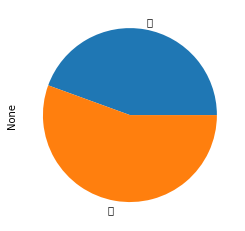

In [20]:
dat_count = dat.groupby(['성별']).size()
dat_count.plot.pie(y = '타임스탬프')